**Mutual Information:**
- MI can act as an indicator of relative potential of a feature as a predictor of the target.
- Usefulness depends on the model used with, Feature is only useful if model can learn target from it.
- Transform feature → to find association.
- Mutual Information is a logarithmic quantity.

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("autos.csv")
df.head()

<ipython-input-37-dac262c123dd>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [38]:
#No. of cols
df.shape[1]

25

**Label Encoding (Categorical):**

- MI treats discrete features differently from continuous features.
- Float(continuous), categorical (discrete).

In [62]:
X = df.copy()
y = X.pop("price") #target

# label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize() #index returned "_" is igonored

# all discrete (continuous) features should have integer dtypes -> categorical val
discrete_features = X.dtypes == int  #list of indices or arrays of boolean val. indicating which features are discrete

inverted_columns = ~pd.Series(discrete_features)
X.loc[:, discrete_features]

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,0,0,0,2,0,0,0,2548,0,4,130,0,9,111,5000,21,27
1,3,0,0,0,2,0,0,0,2548,0,4,130,0,9,111,5000,21,27
2,1,0,0,0,2,1,0,0,2823,1,6,152,0,9,154,5000,19,26
3,2,1,0,0,4,2,1,0,2337,2,4,109,0,10,102,5500,24,30
4,2,1,0,0,4,2,2,0,2824,2,5,136,0,8,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-1,20,0,0,4,2,0,0,2952,2,4,141,0,9,114,5400,23,28
189,-1,20,0,1,4,2,0,0,3049,2,4,141,0,8,160,5300,19,25
190,-1,20,0,0,4,2,0,0,3012,1,6,173,0,8,134,5500,18,23
191,-1,20,1,1,4,2,0,0,3217,2,6,145,5,23,106,4800,26,27


**Mutual Info Regression: Continuous Target**
- Real-valued targets: mutual_info_regression
- Categorical targets: mutual_info_classif
- target: price (real valued)

In [52]:
#calc. MI wrt 'y' (target)
from sklearn.feature_selection import mutual_info_regression #continuous target value

# X(df), y(target) -> mi_scores
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # examine smaller subset of features rather than entire list

curb_weight          1.591170
highway_mpg          0.945136
length               0.613348
bore                 0.495058
stroke               0.379912
num_of_cylinders     0.331337
compression_ratio    0.134826
fuel_type            0.047298
Name: MI Scores, dtype: float64

**Comparison between MI Scores: Bar plot**

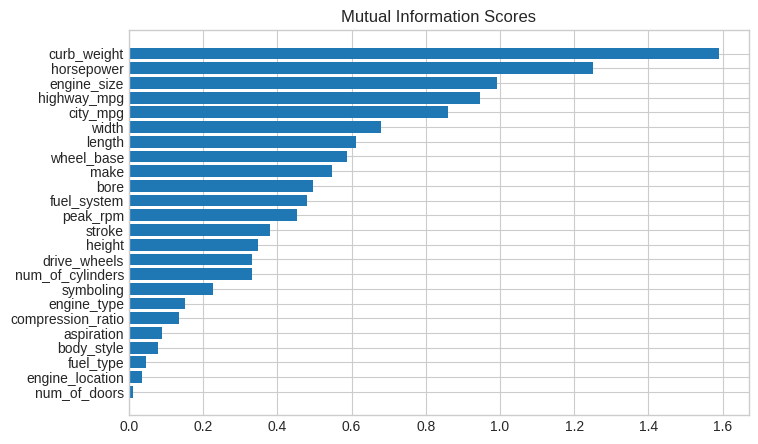

In [63]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    #y-axis parameter
    width = np.arange(len(scores))
    ticks = list(scores.index)
    #horizontal bar chart
    plt.barh(width, scores)
    plt.yticks(width, ticks) #(pos., label)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

**Scatter Plot: highest MI score feature**

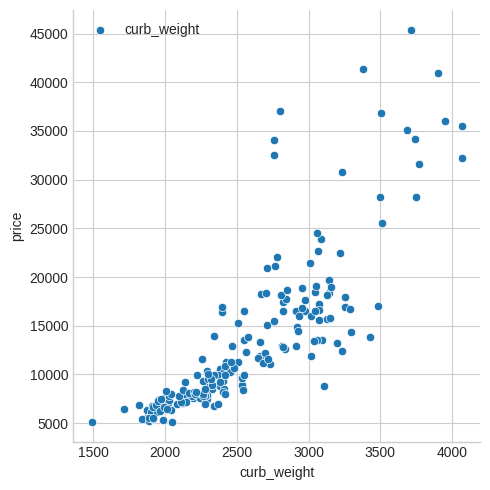

In [83]:
#relplot: relational plot
sns.relplot(x="curb_weight", y="price", data=df, label='curb_weight');
plt.legend()
plt.show()

Trend shows high-scoring `curb_weight` feature exhibits a strong relationship with `price, the target.

**Investigate Possible Interaction Effects:**

Feature `fuel_type` has low MI score, but it separates two `price` population with different trends within `horsepower` feature. This infers that `fuel_type` contributes to an interaction effect.

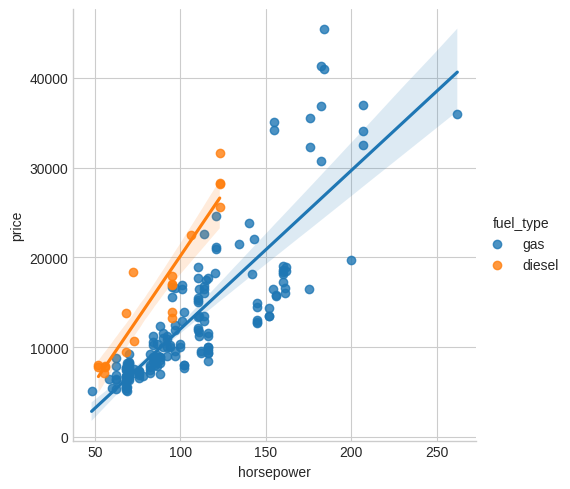

In [84]:
#lmplot: scatter plot with linear fit
sns.lmplot(x="horsepower", y="price", hue='fuel_type', data=df); #fuel_type: categorical val, horsepower: continuous val